In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train_preprocessed.csv')
test = pd.read_csv('data/test_preprocessed.csv')

In [3]:
y_train = train['Transported']
y_test = test['Transported']

In [4]:
X_train = train.drop(['PassengerId', 'Name', 'Transported'], axis=1)
X_test = test.drop(['PassengerId', 'Name', 'Transported'], axis=1)

In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
rf_model = RandomForestClassifier()

In [7]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
rf_pred_test = rf_model.predict(X_test)

In [9]:
gb_model = GradientBoostingClassifier()

In [10]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [12]:
gb_pred_test = gb_model.predict(X_test)

In [15]:
print(classification_report(y_test, rf_pred_test))
print(classification_report(y_test, gb_pred_test))

              precision    recall  f1-score   support

       False       0.79      0.83      0.81      1289
        True       0.82      0.78      0.80      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608

              precision    recall  f1-score   support

       False       0.82      0.75      0.78      1289
        True       0.78      0.84      0.81      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



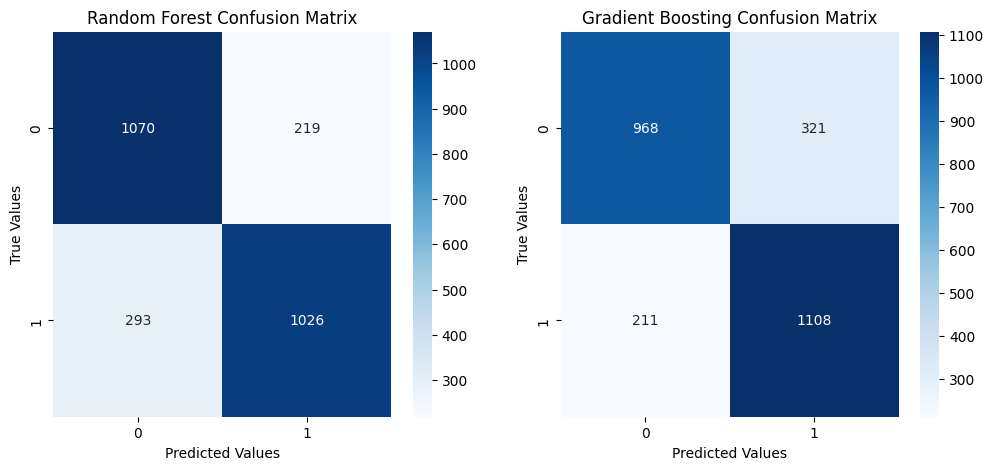

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, rf_pred_test), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Random Forest Confusion Matrix')
axs[0].set_ylabel('True Values')
axs[0].set_xlabel('Predicted Values')

sns.heatmap(confusion_matrix(y_test, gb_pred_test), annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Gradient Boosting Confusion Matrix')
axs[1].set_ylabel('True Values')
axs[1].set_xlabel('Predicted Values')

plt.show()
